# Capstone Project - The Battle of Neighborhoods

In [44]:
!pip install beautifulsoup4
!pip install html5lib
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [45]:
source = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(source,'html5lib')
table = soup.find('table')
print (table)

<table border="1" class="wikitable sortable" style="float:center; text-align:right; font-size:85%; margin:1em;">

<tbody><tr>
<th colspan="9" style="background-color:tan;"><div style="text-align:center; position:relative; white-space:nowrap;">New York City's <a href="/wiki/Boroughs_of_New_York_City" title="Boroughs of New York City">five boroughs</a><div class="plainlinks hlist navbar mini" style="position:absolute; right:0; top:0; margin:0 5px;"><ul><li class="nv-view"><a href="/wiki/Template:NYC_boroughs" title="Template:NYC boroughs"><abbr title="View this template">v</abbr></a></li><li class="nv-talk"><a href="/wiki/Template_talk:NYC_boroughs" title="Template talk:NYC boroughs"><abbr title="Discuss this template">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Template:NYC_boroughs&amp;action=edit"><abbr title="Edit this template">e</abbr></a></li></ul></div></div>
</th></tr>
<tr style="background:#dedebb;">
<th colspan

In [46]:
!pip install lxml
data = pd.read_html(str(table))
df=pd.DataFrame(data[0])
df.head(10)

New York City's five boroughsvte  \
                                       Jurisdiction   
                                            Borough   
0                                         The Bronx   
1                                          Brooklyn   
2                                         Manhattan   
3                                            Queens   
4                                     Staten Island   
5                                  City of New York   
6                                 State of New York   
7  Sources:[14] and see individual borough articles   

                                                     \
                                                      
                                             County   
0                                             Bronx   
1                                             Kings   
2                                          New York   
3                                            Queens   
4                                          Richmond   
5                                  City of New York   
6                                 State of New York   
7  Sources:[14] and see individual borough articles   

                                                     \
                                         Population   
                                Estimate (2018)[12]   
0                                           1432132   
1                                           2582830   
2                                           1628701   
3                                           2278906   
4                                            476179   
5                                           8398748   
6                                          19745289   
7  Sources:[14] and see individual borough articles   

                                                     \
                             Gross Domestic Product   
                                  billions(US$)[13]   
0                                            42.695   
1                                            91.559   
2                                           600.244   
3                                            93.310   
4                                            14.514   
5                                           842.343   
6                                          1701.399   
7  Sources:[14] and see individual borough articles   

                                                     \
                                                      
                                    per capita(US$)   
0                                             29200   
1                                             34600   
2                                            360900   
3                                             39600   
4                                             30300   
5                                             97700   
6                                             85700   
7  Sources:[14] and see individual borough articles   

                                                     \
                                          Land area   
                                       square miles   
0                                             42.10   
1                                             70.82   
2                                             22.83   
3                                            108.53   
4                                             58.37   
5                                            302.64   
6                                             47214   
7  Sources:[14] and see individual borough articles   

                                                     \
                                                      
                                           squarekm   
0                                            109.04   
1                                            183.42   
2                                             59.13   
3                                            281.09  

In [47]:
df.shape

(8, 9)

In [48]:
df.columns = pd.Index(range(len(df.columns)))
df.head(10)

,0,1,2,3,4,5,6,7,8
0,The Bronx,Bronx,1432132,42.695,29200,42.10,109.04,34653,13231
1,Brooklyn,Kings,2582830,91.559,34600,70.82,183.42,37137,14649
2,Manhattan,New York,1628701,600.244,360900,22.83,59.13,72033,27826
3,Queens,Queens,2278906,93.310,39600,108.53,281.09,21460,8354
4,Staten Island,Richmond,476179,14.514,30300,58.37,151.18,8112,3132
5,City of New York,City of New York,8398748,842.343,97700,302.64,783.83,28188,10947
6,State of New York,State of New York,19745289,1701.399,85700,47214,122284,416.4,159
7,Sources:[14] and see individual borough articles,Sources:[14] and see individual borough articles,Sources:[14] and see individual borough articles,Sources:[14] and see individual borough articles,Sources:[14] and see individual borough articles,Sources:[14] and see individual borough articles,Sources:[14] and see individual borough articles,Sources:[14] and see individual borough articles,Sources:[14] and see individual borough articles


In [49]:
df1=df.drop(df.index[[5,6,7]],axis=0)
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,The Bronx,Bronx,1432132,42.695,29200,42.10,109.04,34653,13231
1,Brooklyn,Kings,2582830,91.559,34600,70.82,183.42,37137,14649
2,Manhattan,New York,1628701,600.244,360900,22.83,59.13,72033,27826
3,Queens,Queens,2278906,93.310,39600,108.53,281.09,21460,8354
4,Staten Island,Richmond,476179,14.514,30300,58.37,151.18,8112,3132


In [50]:
df_ny=df1[[0,1,2,7]]
df_ny[7]=pd.to_numeric(df_ny[7])
df_ny[2]=pd.to_numeric(df_ny[2])
df_ny.rename(columns={0:'Borough',1:'County',2:'Population',7:'Density'},inplace=True)
df_ny.set_index('Borough')
df_ny.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,Borough,County,Population,Density
0,The Bronx,Bronx,1432132,34653
1,Brooklyn,Kings,2582830,37137
2,Manhattan,New York,1628701,72033
3,Queens,Queens,2278906,21460
4,Staten Island,Richmond,476179,8112


### Plot density per Borough

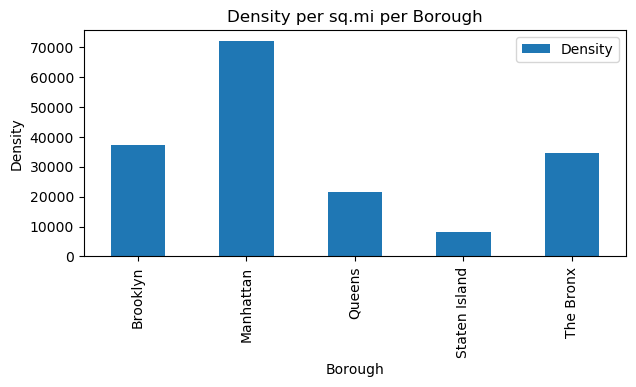

In [51]:
plt.figure(figsize=(7,3), dpi = 100)
plt.title('Density per sq.mi per Borough')
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('Density',fontsize=10)
df_ny.groupby('Borough')['Density'].sum().plot(kind='bar')
plt.legend()
plt.show()

### Get the latitude and longitude values of New York City.

In [52]:
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

# All requested packages already installed.



In [53]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    
    features=resp['features']
    
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [54]:
new_york_df = get_new_york_data()
new_york_df.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [55]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(new_york_df['Borough'].unique()),
        new_york_df.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


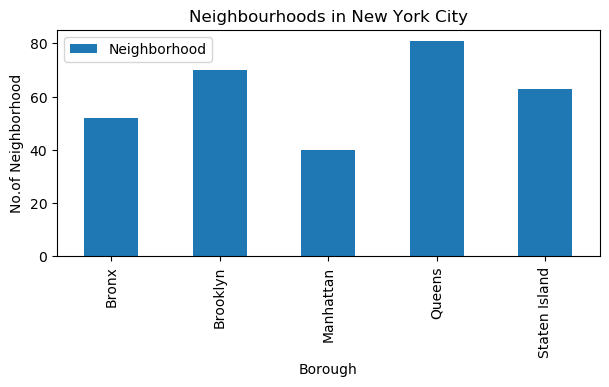

In [56]:
plt.figure(figsize=(7,3), dpi = 100)
plt.title('Neighbourhoods in New York City')
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('No.of Neighborhood', fontsize=10)
new_york_df.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
plt.legend()
plt.show()

#### Use geopy library to get the latitude and longitude values of New York City.

In [57]:
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

Solving environment: done

# All requested packages already installed.



In [58]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top

In [59]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(new_york_df['Latitude'], new_york_df['Longitude'], new_york_df['Borough'], new_york_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### Get data from Foursquare on the coffee shops in each Borough

In [60]:
CLIENT_ID = 'PXICA52UEJDRRVYL2WWTLIYAV2EELBHJ3P5XJYLBWP1EMVRV'
CLIENT_SECRET = 'ACVAM1EVIZILAKSIPET4CNKN0VLM54EKAV4ISN4ZUVDBSIXI'
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500

In [63]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
   
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [64]:
ny_venues = getNearbyVenues(names=new_york_df['Neighborhood'],
                                latitudes=new_york_df['Latitude'],
                                longitudes=new_york_df['Longitude'])
ny_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,32,32,32,32,32,32
Annadale,14,14,14,14,14,14
Arden Heights,4,4,4,4,4,4
Arlington,7,7,7,7,7,7
Arrochar,20,20,20,20,20,20
...,...,...,...,...,...,...
Woodhaven,24,24,24,24,24,24
Woodlawn,25,25,25,25,25,25
Woodrow,18,18,18,18,18,18


In [65]:
to_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = ny_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(9777, 426)


,Neighborhoods,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped

(300, 426)


,Neighborhoods,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Allerton,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
1,Annadale,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
2,Arden Heights,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
3,Arlington,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
4,Arrochar,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Woodhaven,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
296,Woodlawn,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
297,Woodrow,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0
298,Woodside,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0


In [67]:
df_coffee = to_grouped[["Neighborhoods","Coffee Shop"]]
df_coffee.head(10)

,Neighborhoods,Coffee Shop
0,Allerton,0.000000
1,Annadale,0.000000
2,Arden Heights,0.250000
3,Arlington,0.142857
4,Arrochar,0.000000
5,Arverne,0.058824
6,Astoria,0.010204
7,Astoria Heights,0.000000
8,Auburndale,0.000000
9,Bath Beach,0.020408


In [100]:
from sklearn.cluster import KMeans
toclusters = 3

to_clustering = df_coffee.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=1)
kmeans.fit_transform(to_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
      dtype=int32)

In [101]:
df_merged = df_coffee.copy()
# add clustering labels
df_merged["Cluster Labels"] = kmeans.labels_
df_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
df_merged.head(10)

,Neighborhood,Coffee Shop,Cluster Labels
0,Allerton,0.000000,1
1,Annadale,0.000000,1
2,Arden Heights,0.250000,2
3,Arlington,0.142857,2
4,Arrochar,0.000000,1
5,Arverne,0.058824,0
6,Astoria,0.010204,1
7,Astoria Heights,0.000000,1
8,Auburndale,0.000000,1
9,Bath Beach,0.020408,1


In [102]:
df_merged = df_merged.join(ny_venues.set_index("Neighborhood"), on="Neighborhood")
print(df_merged.shape)
df_merged.head()

(9777, 9)


,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allerton,0.0,1,40.865788,-73.859319,Domenick's Pizzeria,40.865576,-73.858124,Pizza Place
0,Allerton,0.0,1,40.865788,-73.859319,Bronx Martial Arts Academy,40.865721,-73.857529,Martial Arts Dojo
0,Allerton,0.0,1,40.865788,-73.859319,White Castle,40.866065,-73.862307,Fast Food Restaurant
0,Allerton,0.0,1,40.865788,-73.859319,Dunkin',40.865204,-73.859007,Donut Shop
0,Allerton,0.0,1,40.865788,-73.859319,Sal & Doms Bakery,40.865377,-73.855236,Dessert Shop


In [103]:
df_merged = df_merged.join(new_york_df.set_index("Neighborhood"), on="Neighborhood")
df_merged.head()

,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough,Latitude,Longitude
0,Allerton,0.0,1,40.865788,-73.859319,Domenick's Pizzeria,40.865576,-73.858124,Pizza Place,Bronx,40.865788,-73.859319
0,Allerton,0.0,1,40.865788,-73.859319,Bronx Martial Arts Academy,40.865721,-73.857529,Martial Arts Dojo,Bronx,40.865788,-73.859319
0,Allerton,0.0,1,40.865788,-73.859319,White Castle,40.866065,-73.862307,Fast Food Restaurant,Bronx,40.865788,-73.859319
0,Allerton,0.0,1,40.865788,-73.859319,Dunkin',40.865204,-73.859007,Donut Shop,Bronx,40.865788,-73.859319
0,Allerton,0.0,1,40.865788,-73.859319,Sal & Doms Bakery,40.865377,-73.855236,Dessert Shop,Bronx,40.865788,-73.859319


In [104]:
df_merged.drop(columns=['Latitude','Longitude'])

,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
0,Allerton,0.00,1,40.865788,-73.859319,Domenick's Pizzeria,40.865576,-73.858124,Pizza Place,Bronx
0,Allerton,0.00,1,40.865788,-73.859319,Bronx Martial Arts Academy,40.865721,-73.857529,Martial Arts Dojo,Bronx
0,Allerton,0.00,1,40.865788,-73.859319,White Castle,40.866065,-73.862307,Fast Food Restaurant,Bronx
0,Allerton,0.00,1,40.865788,-73.859319,Dunkin',40.865204,-73.859007,Donut Shop,Bronx
0,Allerton,0.00,1,40.865788,-73.859319,Sal & Doms Bakery,40.865377,-73.855236,Dessert Shop,Bronx
...,...,...,...,...,...,...,...,...,...,...
299,Yorkville,0.08,0,40.775930,-73.947118,Row House East,40.779809,-73.946441,Gym / Fitness Center,Manhattan
299,Yorkville,0.08,0,40.775930,-73.947118,Arturo's,40.775321,-73.947662,Italian Restaurant,Manhattan
299,Yorkville,0.08,0,40.775930,-73.947118,Starbucks,40.779118,-73.947470,Coffee Shop,Manhattan
299,Yorkville,0.08,0,40.775930,-73.947118,Thai Peppercorn,40.779894,-73.947155,Thai Restaurant,Manhattan


In [105]:
df_merged2=df_merged[df_merged['Venue Category'] == "Coffee Shop"]
df_merged2.shape

(304, 12)

In [109]:
df_merged2.sort_values(["Cluster Labels"], inplace=True)
df_merged2.head(20)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough,Latitude,Longitude
150,Lenox Hill,0.050000,0,40.768113,-73.958860,Gotham Coffee House,40.766418,-73.960219,Coffee Shop,Manhattan,40.768113,-73.958860
60,Cobble Hill,0.040404,0,40.687920,-73.998561,Salter House,40.690878,-73.996307,Coffee Shop,Brooklyn,40.687920,-73.998561
62,Concord,0.100000,0,40.604473,-74.084024,Starbucks,40.606393,-74.078682,Coffee Shop,Staten Island,40.604473,-74.084024
64,Concourse Village,0.028571,0,40.824780,-73.915847,Starbucks,40.825556,-73.918865,Coffee Shop,Bronx,40.824780,-73.915847
69,Cypress Hills,0.034483,0,40.682391,-73.876616,Mexican Restaurant Coffee Shop,40.683627,-73.872922,Coffee Shop,Brooklyn,40.682391,-73.876616
73,Downtown,0.043956,0,40.690844,-73.983463,Hungry Ghost,40.689853,-73.980247,Coffee Shop,Brooklyn,40.690844,-73.983463
53,Civic Center,0.045977,0,40.715229,-74.005415,Laughing Man Coffee & Tea,40.717394,-74.010103,Coffee Shop,Manhattan,40.715229,-74.005415
49,Chelsea,0.065421,0,40.744035,-74.003116,Terremoto,40.740999,-74.003205,Coffee Shop,Manhattan,40.744035,-74.003116
49,Chelsea,0.065421,0,40.744035,-74.003116,St Kilda Coffee,40.743854,-73.999770,Coffee Shop,Staten Island,40.594726,-74.189560
49,Chelsea,0.065421,0,40.744035,-74.003116,St Kilda Coffee,40.743854,-73.999770,Coffee Shop,Manhattan,40.744035,-74.003116


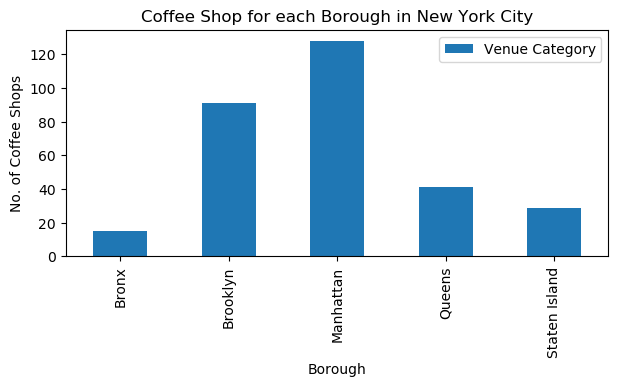

In [107]:
plt.figure(figsize=(7,3), dpi = 100)
plt.title('Coffee Shop for each Borough in New York City')
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('No. of Coffee Shops', fontsize=10)
df_merged2.groupby('Borough')['Venue Category'].count().plot(kind='bar')
plt.legend()
plt.show()

In [108]:
map_clusters = folium.Map(location=[latitude, longitude],zoom_start=10)

# set color scheme for the clusters

# add markers to the map
markers_colors={}
markers_colors[0] = 'red'
markers_colors[1] = 'blue'
markers_colors[2] = 'green'
markers_colors[3] = 'yellow'
for lat, lon, cluster in zip(df_merged2['Neighborhood Latitude'], df_merged2['Neighborhood Longitude'], df_merged2['Cluster Labels']):
    
    
    folium.features.CircleMarker(
        [lat, lon],
        radius=5,
       
        color =markers_colors[cluster],
        fill_color=markers_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [112]:
cluster0=df_merged2[df_merged2['Borough'] == "Manhattan"]
cluster0.head(10)                                                                    

,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough,Latitude,Longitude
150,Lenox Hill,0.050000,0,40.768113,-73.958860,Gotham Coffee House,40.766418,-73.960219,Coffee Shop,Manhattan,40.768113,-73.958860
53,Civic Center,0.045977,0,40.715229,-74.005415,Laughing Man Coffee & Tea,40.717394,-74.010103,Coffee Shop,Manhattan,40.715229,-74.005415
49,Chelsea,0.065421,0,40.744035,-74.003116,Terremoto,40.740999,-74.003205,Coffee Shop,Manhattan,40.744035,-74.003116
49,Chelsea,0.065421,0,40.744035,-74.003116,St Kilda Coffee,40.743854,-73.999770,Coffee Shop,Manhattan,40.744035,-74.003116
43,Carnegie Hill,0.079545,0,40.782683,-73.953256,Jack’s Stir Brew Coffee,40.781152,-73.954383,Coffee Shop,Manhattan,40.782683,-73.953256
43,Carnegie Hill,0.079545,0,40.782683,-73.953256,Birch Coffee,40.780275,-73.953445,Coffee Shop,Manhattan,40.782683,-73.953256
43,Carnegie Hill,0.079545,0,40.782683,-73.953256,DTUT,40.780818,-73.949350,Coffee Shop,Manhattan,40.782683,-73.953256
49,Chelsea,0.065421,0,40.744035,-74.003116,Intelligentsia Coffee,40.745926,-74.005376,Coffee Shop,Manhattan,40.744035,-74.003116
57,Clinton,0.050000,0,40.759101,-73.996119,The Jolly Goat Coffee Bar,40.763245,-73.994166,Coffee Shop,Manhattan,40.759101,-73.996119
261,Stuyvesant Town,0.058824,0,40.731000,-73.974052,B Cup Cafe,40.728783,-73.978565,Coffee Shop,Manhattan,40.731000,-73.974052
